### 1 Question
1. (70 points) Problem of anomaly detection: You are given the dataset of network user activity, and the task is to classify each user activity as normal or an attack. Attacks are also categorized as follows
- Denial of Service (dos): Intruder tries to consume server resources as much as possible, so that normal users can’t get resources they need. - Remote to Local (r2l): Intruder has no legitimate access to victim machine but tries to gain access. - User to Root (u2r): Intruder has limited privilege access to victim machine but tries to get root privilege. - Probe: Intruder tries to gain some information about victim machine.

Download dataset from here (http://researchweb.iiit.ac.in/~murtuza.bohra/intrusion_ detection.zip). Dataset contains 29 numerical features and ﬁve classes(one normal and four attacks).

1. Part-1: (20 points) Do dimensionality reduction using PCA on given dataset. Keep the tolerance of 10% (knee method), meaning reconstruction of the original data from the reduced dimensions in PCA space can be done with 10% error. You are only allowed to use eigen decomposition or SVD function from python library(do not use library function to compute PCA directly).
2. Part-2: (15 points) Use the reduced dimensions from the ﬁrst part and perform Kmeans clustering with k equal to ﬁve(number of classes in the data). Also calculate the purity of clusters with given class label. Purity is the fraction of actual class samples in that cluster. You are not allowed to use inbuilt function for K-means.
3. Part-3 (15 points) Perform GMM (with ﬁve Gaussian) on the reduced dimensions from ﬁrst part and calculate the purity of clusters. You can use python library for GMM.
4. Part-4: (15 points) Perform Hierarchical clustering with single-linkage and ﬁve clusters. Also calculate the purity of clusters. Create a pie chart comparing purity of diﬀerent clustering methods you have tried for all classes. You can use python library for hierarchical clustering.
5. Part-5: (5 points) Original data of network user activity is available here(https: //www.kaggle.com/what0919/intrusion-detection). Original data also contains categorical feature. If you were to do dimensionality reduction on original data, could you use PCA? Justify. Write a paragraph in report for your explanation/justiﬁcation.

### 2 Question
2. (20 points) Question carry forwarded from assignment-2. Use the Admission dataset to perform the following task. Dataset can be downloaded from http://preon. iiit.ac.in/~sanjoy_chowdhury/AdmissionDataset.zip
1. Part-1: (10 points) Implement logistic regression model to predict if the student will get admit.
2. Part-2: (5 points) Compare the performances of logistic regression model with KNN model on the Admission dataset.
3. Part-3: (5 points) Plot a graph explaining the co-relation between threshold value vs precision and recall. Report the criteria one should use while deciding the threshold value. Explain the reason behind your choice of threshold in your model.

### 3 Question
3. (10 points) Implement logistic regression using One vs All and One vs One approaches. Use the following dataset http://preon.iiit.ac.in/~sanjoy_chowdhury/wine-quality. zip for completing the task. Report your observations and accuracy of the model.

----------------------------------------------------------------------------------------------------------------------------

#### Question 1
##### Part-1

In [311]:
import pandas as pd
df_anomaly = pd.read_csv("intrusion_detection/data.csv")

print(df_anomaly.shape)
df_anomaly.head()

(24998, 30)


,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


In the dataset there 29 features and 5 classes

In [312]:
label = df_anomaly["xAttack"]
df_anomaly = df_anomaly.iloc[:,df_anomaly.columns != "xAttack"]
df_anomaly.shape

(24998, 29)

In [313]:
from sklearn.preprocessing import StandardScaler
import numpy as np
standardized_data = StandardScaler().fit_transform(df_anomaly)
covariance_matrix = np.cov(standardized_data.T)
print(covariance_matrix.shape)

(29, 29)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [314]:
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
print("eigen vectors shape:",eig_vectors.shape)
print("eigen values:",eig_values)

eigen vectors shape: (29, 29)
eigen values: [6.73792010e+00 4.86394323e+00 2.61304344e+00 1.88825019e+00
 1.47239103e+00 1.34445489e+00 1.13686784e+00 1.05599217e+00
 9.19031673e-01 9.62884727e-01 9.97747022e-01 1.00605989e+00
 7.16997425e-01 6.55723024e-01 4.96856883e-01 4.47530656e-01
 4.12119820e-01 4.02113812e-01 3.45219725e-01 2.10204295e-01
 9.70901692e-02 6.64827642e-02 5.21876041e-02 3.96458945e-02
 2.89025639e-02 1.63697530e-02 1.00407728e-03 9.49076867e-03
 4.63468452e-03]


###### to keep the tolerance upto 10%, we need eigen vectors corresponding to top k eigen values so that the sum(k eigen values)/sum(all eigen values) >0.9 

In [315]:
part_sum=0
for k in range(len(eig_values)):
    part_sum+=eig_values[k]
    if part_sum/np.sum(eig_values) >= 0.9:
        break
k_eig_vecs = eig_vectors[:,0:k+1]

In [316]:
new_data = np.matmul(standardized_data,k_eig_vecs)
print("shape of new_data is:",new_data.shape)

shape of new_data is: (24998, 14)


Dimension is reduced to 14 from 29 using PCA and 90 percent information is stored

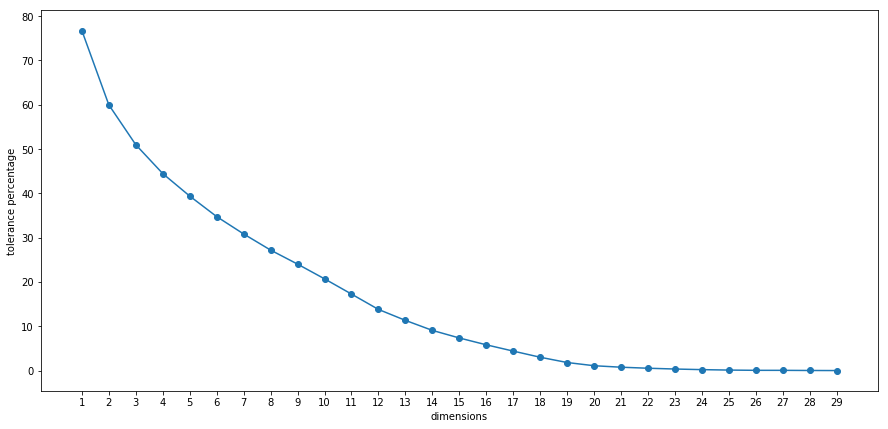

In [317]:
tolerance=[]
dimensions=[]
part_sum=0
for i in range(len(eig_values)):
    part_sum+=eig_values[i]
    tolerance.append((1-float(part_sum)/float(np.sum(eig_values)))*100)
    dimensions.append(i+1)
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
# plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.rcParams['figure.figsize'] = [15, 7]

plt.xticks(np.arange(min(dimensions), max(dimensions)+1, 1.0))

plt.xlabel("dimensions")
plt.ylabel("tolerance percentage")

plt.plot(dimensions,tolerance)
plt.scatter(dimensions,tolerance)
plt.show()


##### Part-2

##### Using K-means clustering

In [318]:
def find_clusters(new_data,clusters):
    current_clusters = []
    for rows in new_data:
        dist=[]
        for i in clusters:
            dist.append(np.sum((rows-i)**2))
        current_clusters.append(dist.index(min(dist)))
    return current_clusters
def k_means(new_data,k):
    shape = new_data.shape
    clusters = np.random.rand(k,shape[1])       #initialise 5 random cluster centres
    cluster_label= find_clusters(new_data,clusters)
    new_cluster_label=[]
    while(1):    
        for cluster in range(len(clusters)):
            indices = [i for i in range(len(cluster_label)) if cluster_label[i]== cluster]
            clustered_points = new_data[np.array(indices)]
            clusters[cluster]=np.mean(clustered_points,axis=0)     #update new cluster centres
        new_cluster_label = find_clusters(new_data,clusters)
        if(new_cluster_label == cluster_label):
            break
        else:
            cluster_label = new_cluster_label
    return new_cluster_label


In [319]:
# training K-means
c_labels = k_means(new_data,5)

In [320]:
mapping=dict(zip(c_labels,label))
mapping

{2: 'normal', 0: 'dos', 1: 'dos', 4: 'dos', 3: 'probe'}

In [321]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_label=le.fit_transform(label)

In [322]:
def compute_purity(c_labels,new_label):
    confusion_matrix =  np.zeros((5,5))
    confusion_matrix  =  confusion_matrix.astype(int)
    for i  in range(len(c_labels)):
        x = c_labels[i]
        confusion_matrix[x, new_label[i]] += 1
    
    temp = np.amax(confusion_matrix,  axis = 1)
    purity_level = np.sum(temp)/np.sum(confusion_matrix)
    return confusion_matrix,purity_level

In [324]:
confusion_matrix , purity =compute_purity(c_labels,encoded_label)
print(confusion_matrix)
print(purity)

[[ 1364   534  1057    10     0]
 [ 4266    29    71     0     0]
 [  921 12565   357    62    10]
 [   18   225   821   125     0]
 [ 2545    11     7     0     0]]
0.8625090007200577


#### Part-3

Appying GMM

In [325]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components = 5)
GMM.fit(new_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [326]:
gmm_labels=GMM.predict(new_data)

In [327]:
print("purity of GMM:")
confusion_matrix,purity = compute_purity(gmm_labels,encoded_label)
print(confusion_matrix)
print(purity)


purity of GMM:
[[ 6184     0     0     0     0]
 [  458   639   810    72     5]
 [ 2398 11972  1169    97     3]
 [   74   750   333    28     2]
 [    0     3     1     0     0]]
0.7888231058484679


#### Part-4

Hierachial Clustering

In [328]:
from sklearn.cluster import AgglomerativeClustering
hierarch = AgglomerativeClustering(linkage="single",n_clusters=5)
hierarch_lables = hierarch.fit_predict(new_data)

In [329]:
print("purity of clusters:")
confusion_matrix ,purity=compute_purity(hierarch_lables,encoded_label)

purity of clusters:


(array([[ 9114, 13360,  2312,   193,    10],
        [    0,     0,     1,     0,     0],
        [    0,     2,     0,     4,     0],
        [    0,     1,     0,     0,     0],
        [    0,     1,     0,     0,     0]]), 0.5347227778222258)

In [330]:
hierarch = AgglomerativeClustering(n_clusters=5)
hierarch_lables = hierarch.fit_predict(new_data)

In [331]:
print("purity using ward linkage:")
confusion_matrix,purity = compute_purity(hierarch_lables,encoded_label)
print(confusion_matrix)
print(purity)

purity using ward linkage:
[[  941 12724   481   197    10]
 [ 6805    20    29     0     0]
 [ 1368   578  1052     0     0]
 [    0     8     0     0     0]
 [    0    34   751     0     0]]
0.8663093047443795


Purity of clusters are better using "ward" linkage.

>ward minimizes the variance of the clusters being merged.

>average uses the average of the distances of each observation of the two sets.

>complete or maximum linkage uses the maximum distances between all observations of the two sets.

>single uses the minimum of the distances between all observations of the two sets.

In [339]:
for i in confusion_matrix:
    print(np.max(i))
    

12724
6805
1368
8
751


In [373]:
kmeans_labels = k_means(new_data,5)
GMM = GaussianMixture(n_components = 5)
GMM.fit(new_data)
gmm_labels = GMM.predict(new_data)
hierarch = AgglomerativeClustering(n_clusters=5)
hierarch_lables = hierarch.fit_predict(new_data)
conf_mat_kmeans,purity = compute_purity(kmeans_labels,encoded_label)
conf_mat_gmm,purity = compute_purity(gmm_labels,encoded_label)
conf_mat_hier,purity = compute_purity(hierarch_lables,encoded_label)




    

In [374]:
purity_kmeans=[]
purity_gmm=[]
purity_hier=[]
for i in conf_mat_kmeans:
    num=np.max(i)
    den=np.sum(i)
    purity_kmeans.append(num/den)
    

for i in conf_mat_gmm:
    num=np.max(i)
    den=np.sum(i)
    purity_gmm.append(num/den)
for i in conf_mat_hier:
    num=np.max(i)
    den=np.sum(i)
    purity_hier.append(num/den)

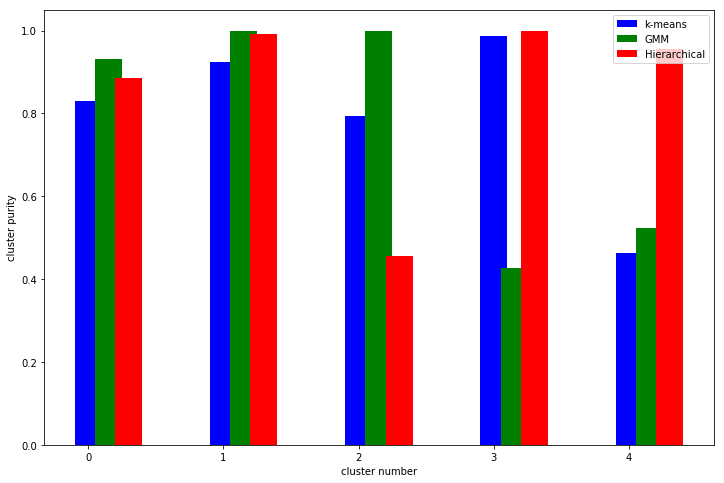

In [380]:
import matplotlib.pyplot as plt
x  = np.arange(5)
plt.figure(figsize=(12,8))

plt.bar(x+0.00,purity_kmeans ,color='b',width=0.20)
plt.bar(x+0.15, purity_gmm,color='g',width=0.20)
plt.bar(x+0.30, purity_hier,color='r',width=0.20)
plt.legend(['k-means','GMM','Hierarchical'],loc='best')
plt.xlabel("cluster number")
plt.ylabel("cluster purity")

plt.show()

#### Part-5

                                        PCA if features are categorical

PCA doesn't works well with categorical data as the data should be standardize before we do PCA, in case of categorical data standardization is not meaning full because in numerical data the mean and variance matters.
Instead we use MCA(Multiple Correspondence Analysis) is used while we have categorical features.
In statistics, multiple correspondence analysis (MCA) is a data analysis technique for nominal categorical data, used to detect and represent underlying structures in a data set. It does this by representing data as points in a low-dimensional Euclidean space. The procedure thus appears to be the counterpart of principal component analysis for categorical data.MCA can be viewed as an extension of simple correspondence analysis (CA) in that it is applicable to a large set of categorical variables.

## Question 2


##### Part-1

    Implementation of LOGISTIC REGRESSION from scratch

In [188]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def loss(h,y):
    return (-y*np.log(h)-(1-y)*np.log(1-h)).mean()
def add_intercept(X):
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept,X),axis=1)
def round_off(X,th):
    X = X.where(X>=th,0)
    X = X.where(X<th,1)
    return X
def LogisticRegressionClassifier(X_train,Y_train,lr=0.1,num_iter = 10000,th = 0.5,Y_train_prob = False):
    X_train = add_intercept(X_train)
    if Y_train_prob == True:
        Y_train = round_off(Y_train,th)
    W = [0]* X_train.shape[1]          # initialise the weight vector
    for i in range(num_iter):
        Z = np.dot(X_train,W)
        H = sigmoid(Z)
        grad = np.dot(X_train.T,(H-Y_train))/Y_train.size
        W = W - lr*grad
    return W
def predict_proba(W,X_test):
    X_test = add_intercept(X_test)
    return sigmoid(np.dot(X_test,W))
def predict(W,X_test,th):
    predictions = predict_proba(W,X_test)>=th
    return predictions.astype(int)


    LOADING THE DATASET

In [189]:
df_admission = pd.read_csv("AdmissionDataset/data.csv")
df_admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [190]:
Y_label = df_admission["Chance of Admit "]
df_admission = df_admission.iloc[:,1:8]
df_admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,317,103,2,2.5,2.0,8.15,0
1,319,108,3,3.0,3.5,8.54,1
2,322,110,3,3.5,2.5,8.67,1
3,326,113,5,4.5,4.0,9.40,1
4,319,106,3,3.5,2.5,8.33,1


STANDARDIZATION IS IMPORTANT IN LOGISTIC REGRESSION

In [191]:
from sklearn.preprocessing import StandardScaler
df_admission = StandardScaler().fit_transform(df_admission)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [192]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_admission,Y_label)

    Training with threshold=0.5

In [193]:
theta = LogisticRegressionClassifier(X_train,Y_train,th=0.5,Y_train_prob=True)
#training with the dataset

In [194]:
Y_pred=predict(theta,X_test,0.5) #predictions


In [195]:
Y_test_bin = round_off(Y_test,0.5)

In [196]:
from sklearn import metrics
from sklearn.metrics import average_precision_score
print(metrics.classification_report(Y_pred,Y_test_bin))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       1.00      0.93      0.96       111

   micro avg       0.93      0.93      0.93       113
   macro avg       0.60      0.96      0.65       113
weighted avg       0.99      0.93      0.95       113



In [197]:
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score
print(confusion_matrix(Y_pred,Y_test_bin))

[[  2   0]
 [  8 103]]


In [198]:
#training with sklearn with th=0.5
Y_train_bin = round_off(Y_train,0.5)

In [199]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train_bin)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [200]:
pred=model.predict(X_test)

In [201]:
print(confusion_matrix(pred,Y_test_bin))

[[  1   0]
 [  9 103]]


    Sklearn and my implementation works same in th=0.5

        Training with threshold = 0.7

In [202]:
theta = LogisticRegressionClassifier(X_train,Y_train,th=0.7,Y_train_prob=True)
#training with the dataset

Y_pred=predict(theta,X_test,0.5) #predictions


Y_test_bin = round_off(Y_test,0.7)

from sklearn import metrics
print(metrics.classification_report(Y_pred,Y_test_bin))
print("avg_precision_score",average_precision_score(Y_pred,Y_test_bin))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_pred,Y_test_bin))

#training with sklearn with th=0.5
Y_train_bin = round_off(Y_train,0.7)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train_bin)

pred=model.predict(X_test)
print("sklearn",metrics.classification_report(pred,Y_test_bin))
print("sklearn:",confusion_matrix(pred,Y_test_bin))
print("avg_precision_score",average_precision_score(pred,Y_test_bin))



              precision    recall  f1-score   support

           0       0.85      0.83      0.84        47
           1       0.88      0.89      0.89        66

   micro avg       0.87      0.87      0.87       113
   macro avg       0.86      0.86      0.86       113
weighted avg       0.87      0.87      0.87       113

avg_precision_score 0.8491472644820948
[[39  8]
 [ 7 59]]
sklearn               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        47
         1.0       0.88      0.89      0.89        66

   micro avg       0.87      0.87      0.87       113
   macro avg       0.86      0.86      0.86       113
weighted avg       0.87      0.87      0.87       113

sklearn: [[39  8]
 [ 7 59]]
avg_precision_score 0.8491472644820948


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Same performance as sklearn

    KNN with threshold 0.5

#### Part-2

In [203]:
Y_train_bin = round_off(Y_train,0.7)
Y_test_bin = round_off(Y_test,0.7)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train_bin)
knn_pred = knn.predict(X_test)
print("knn metrics: ")
print(metrics.classification_report(knn_pred,Y_test_bin))
print(confusion_matrix(knn_pred,Y_test_bin))

knn metrics: 
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82        42
         1.0       0.91      0.86      0.88        71

   micro avg       0.86      0.86      0.86       113
   macro avg       0.85      0.86      0.85       113
weighted avg       0.86      0.86      0.86       113

[[36  6]
 [10 61]]


Logistic performs better than knn in this dataset

#### Part-3

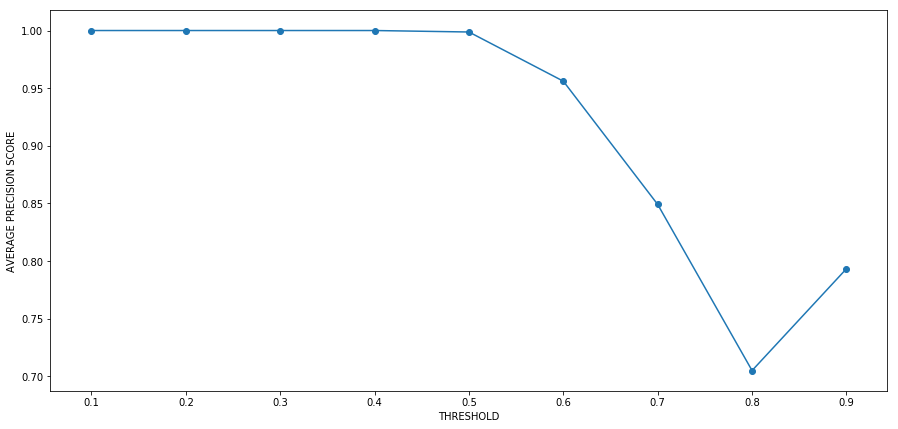

In [204]:
from sklearn.metrics import average_precision_score
thresholds =np.arange(0.1,1,0.1)
average_precision_recall = []
for i in range(len(thresholds)):
    th=np.around(thresholds[i],decimals=1)
    Y_train_bin = round_off(Y_train,th)
    Y_test_bin = round_off(Y_test,th)
    theta = LogisticRegressionClassifier(X_train,Y_train_bin,th=th,Y_train_prob=True)
    prediction = predict(theta,X_test,0.5)
    avg_precision_score = average_precision_score(prediction,Y_test_bin)
    average_precision_recall.append(avg_precision_score)
plt.xlabel("THRESHOLD")
plt.ylabel("AVERAGE PRECISION SCORE")
plt.plot(thresholds,average_precision_recall)
plt.scatter(thresholds,average_precision_recall)
plt.show()


### Question 3

In [205]:
#loading the dataset
df_wine = pd.read_csv("wine-quality/data.csv",sep=";",header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,9.2,0.25,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7
1,6.6,0.20,0.27,10.90,0.038,29.0,130.0,0.99496,3.11,0.44,10.5,7
2,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6
3,7.2,0.23,0.39,14.20,0.058,49.0,192.0,0.99790,2.98,0.48,9.0,7
4,7.6,0.35,0.47,13.30,0.037,42.0,116.0,0.99822,3.04,0.50,9.2,5


In [206]:
df_wine[11].value_counts()

6    1987
5    1311
7     785
8     153
4     150
3      17
9       5
Name: 11, dtype: int64

There are 7 classes in the dataset. The Logistic regression needs to classify the data into 7 classes

#### one vs all

In [232]:
def accuracy(Y_pred,Y_test):
    num=0
    den=0
    for i in range(len(Y_test)):
        if(Y_test[i]==Y_pred[i]):
            num+=1
            den+=1
        else:
            den+=1
    return float(num/den)
Y_label = df_wine[11]
df_wine_X = df_wine.iloc[:,:-1]
df_wine_X = StandardScaler().fit_transform(df_wine_X)
X_train,X_test,Y_train,Y_test = train_test_split(df_wine_X,Y_label,test_size = 0.2)

probabilities = np.zeros([10,X_test.shape[0]])
for i in (Y_train.unique()):
    Y_train_new = Y_train.where(Y_train==i,0)
    Y_train_new = Y_train_new.where(Y_train_new==0,1)
    theta = LogisticRegressionClassifier(X_train,Y_train_new)
    predictions = predict_proba(theta,X_test)
    probabilities[i]=predictions
#     model = LogisticRegression()
#     model.fit(X_train,Y_train)
#     predictions = model.predict(X_test)
#     print("prediction for class label:",i)
#     print(metrics.classification_report(predictions,Y_test))
#     print("accuracy_score:",accuracy_score(predictions,Y_test))
#     print("confusion matrix:\n",confusion_matrix(predictions,Y_test))
#     print("---------------------------------------------------")
class_label_pred=[]
for i in range(probabilities.shape[1]):
    probs = probabilities[:,i]
    class_label_pred.append(np.argmax(probs))
print(metrics.classification_report(class_label_pred,list(Y_test)))
print("accuracy_score:",accuracy(class_label_pred,list(Y_test)))
print("confusion matrix:\n",confusion_matrix(class_label_pred,list(Y_test)))
    
    
               
    
    

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.54      0.55      0.55       260
           6       0.76      0.51      0.61       597
           7       0.13      0.80      0.23        25
           8       0.00      0.00      0.00         0

   micro avg       0.53      0.53      0.53       882
   macro avg       0.24      0.31      0.23       882
weighted avg       0.68      0.53      0.58       882

accuracy_score: 0.5294784580498866
confusion matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  17 144  94   4   0]
 [  2  13 120 303 127  32]
 [  0   0   1   1  20   3]
 [  0   0   0   0   0   0]]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


accuracy is around 52 percent, which is not good as logistic regression don't perform well with imbalanced dataset, and the dataset is highly imbalanced

### one vs one

In [310]:
import math
Y_label = df_wine[11]
df_wine_X = df_wine.iloc[:,:-1]
df_wine_X = StandardScaler().fit_transform(df_wine_X)
X_train,X_test,Y_train,Y_test = train_test_split(df_wine_X,Y_label,test_size = 0.3)
print(type(X_train))
print(type(Y_train))
unique_labels = Y_train.unique()
f = math.factorial
rows = f(len(unique_labels)) / f(2) / f(len(unique_labels)-2)
pair_predictions = np.zeros([int(rows),X_test.shape[0]])
index=0
for i in range(len(unique_labels)):
    for j in range(i+1,len(unique_labels)):
        class_1 = unique_labels[i]
        class_0 = unique_labels[j]
        X_train_pd = pd.DataFrame(X_train)
        X_train_pd=X_train_pd.assign(output=Y_train)
        X_train_pd = X_train_pd.loc[X_train_pd["output"].isin([class_1,class_0])]
        Y_train_new = X_train_pd.iloc[:,-1]
        X_train_pd = X_train_pd.iloc[:,:-1]
        Y_train_new = Y_train_new.where(Y_train_new==class_1,0)
        Y_train_new = Y_train_new.where(Y_train_new!=class_1,1)
        theta = LogisticRegressionClassifier(X_train_pd,Y_train_new)
        predictions = predict(theta,X_test,0.5)
        predictions = np.where(predictions==1,class_1,class_0)
        pair_predictions[index]=predictions
        index+=1
final_pred =[]
for i in range(pair_predictions.shape[1]):
    column = pair_predictions[:,i]
    counts = np.bincount(column.astype(int))
    final_pred.append(np.argmax(counts))
print(metrics.classification_report(final_pred,list(Y_test)))
print("accuracy_score:",accuracy(final_pred,list(Y_test)))
print("confusion matrix:\n",confusion_matrix(final_pred,list(Y_test)))
            

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.01      0.15      0.01        13
           6       0.99      0.47      0.63      1303
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0

   micro avg       0.46      0.46      0.46      1323
   macro avg       0.14      0.09      0.09      1323
weighted avg       0.97      0.46      0.62      1323

accuracy_score: 0.4603174603174603
confusion matrix:
 [[  0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   5   2   5   1   0   0]
 [  6  45 362 607 234  47   2]
 [  0   1   2   1   0   0   0]
 [  0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0]]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [277]:
a=np.array([[1,2,3],[4,5,6]])
# a =pd.DataFrame(a)
# a=a.assign(b=np.array([8,9]))
# a.loc[a["b"].isin([8,9])]
a[:,1]

array([2, 5])

In [272]:
a=np.array([])
a=np.append(a,[1,2,3],axis=0)
a=np.append(a,[4,5,6],axis=0)
a

array([1., 2., 3., 4., 5., 6.])

In [305]:
a=np.array([1,2,3,4,5])
b=np.where(a==3,5,6)
b

array([6, 6, 5, 6, 6])

In [297]:
a = np.array([1,2.0,3,1,2,1,1,1,3,2,2,1,2,2,2,2])
print(a)
counts = np.bincount(a)
print (np.argmax(counts))
counts

[1. 2. 3. 1. 2. 1. 1. 1. 3. 2. 2. 1. 2. 2. 2. 2.]


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'